<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_cluster_data_add_delta_(_1_2)_n20_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_-1.2'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-1.2_n20.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,86.758281,37.994628,42.525656,0.147367,177.425932,177.312731,0.113200
1,0.0,1.0,88.740109,87.620764,44.170535,-0.099377,230.432030,230.513960,-0.081930
2,0.0,2.0,93.829791,45.911467,69.191808,0.022115,218.955180,218.963594,-0.008414
3,0.0,3.0,48.475919,34.301840,58.512880,0.175965,151.466604,151.301464,0.165139
4,0.0,4.0,44.803305,94.481905,68.919603,-0.009343,218.195470,218.148673,0.046796
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,77.858106,44.302104,86.401044,-0.246307,218.314947,218.532065,-0.217118
19996,999.0,16.0,66.754087,55.153533,22.446626,-0.143980,154.210266,154.327765,-0.117499
19997,999.0,17.0,58.259494,31.531019,40.081086,0.174260,140.045859,139.802804,0.243055
19998,999.0,18.0,62.084504,93.688023,66.031444,0.104318,231.908290,231.871180,0.037110


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    86.758281  37.994628  42.525656  0.147367  177.425932   
      1.0    88.740109  87.620764  44.170535 -0.099377  230.432030   
      2.0    93.829791  45.911467  69.191808  0.022115  218.955180   
      3.0    48.475919  34.301840  58.512880  0.175965  151.466604   
      4.0    44.803305  94.481905  68.919603 -0.009343  218.195470   
...                ...        ...        ...       ...         ...   
999.0 15.0   77.858106  44.302104  86.401044 -0.246307  218.314947   
      16.0   66.754087  55.153533  22.446626 -0.143980  154.210266   
      17.0   58.259494  31.531019  40.081086  0.174260  140.045859   
      18.0   62.084504  93.688023  66.031444  0.104318  231.908290   
      19.0   27.236187  39.564189  25.076032 -0.182381  101.694027   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    177.312731  0.113200  
      1.0    230.513960 -0.081930  
      2.0    218.963594 -0.008414  
      3.0    151.301464  0.165139  
      4.0    218.148673  0.046796  
...                 ...       ...  
999.0 15.0   218.532065 -0.217118  
      16.0   154.327765 -0.117499  
      17.0   139.802804  0.243055  
      18.0   231.871180  0.037110  
      19.0   101.821788 -0.127761  

[20000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    86.758281  37.994628  42.525656  0.147367  177.425932   
      1.0    88.740109  87.620764  44.170535 -0.099377  230.432030   
      2.0    93.829791  45.911467  69.191808  0.022115  218.955180   
      3.0    48.475919  34.301840  58.512880  0.175965  151.466604   
      4.0    44.803305  94.481905  68.919603 -0.009343  218.195470   
...                ...        ...        ...       ...         ...   
999.0 15.0   77.858106  44.302104  86.401044 -0.246307  218.314947   
      16.0   66.754087  55.153533  22.446626 -0.143980  154.210266   
      17.0   58.259494  31.531019  40.081086  0.174260  140.045859   
      18.0   62.084504  93.688023  66.031444  0.104318  231.908290   
      19.0   27.236187  39.564189  25.076032 -0.182381  101.694027   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    177.312731  0.113200  
      1.0    230.513960 -0.081930  
      2.0    218.963594 -0.008414  
      3.0    151.301464  0.165139  
      4.0    218.148673  0.046796  
...                 ...       ...  
999.0 15.0   218.532065 -0.217118  
      16.0   154.327765 -0.117499  
      17.0   139.802804  0.243055  
      18.0   231.871180  0.037110  
      19.0   101.821788 -0.127761  

[20000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,86.758281,37.994628,42.525656,0.147367,177.425932,177.312731,0.113200
1,0.0,1.0,88.740109,87.620764,44.170535,-0.099377,230.432030,230.513960,-0.081930
2,0.0,2.0,93.829791,45.911467,69.191808,0.022115,218.955180,218.963594,-0.008414
3,0.0,3.0,48.475919,34.301840,58.512880,0.175965,151.466604,151.301464,0.165139
4,0.0,4.0,44.803305,94.481905,68.919603,-0.009343,218.195470,218.148673,0.046796
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,77.858106,44.302104,86.401044,-0.246307,218.314947,218.532065,-0.217118
19996,999.0,16.0,66.754087,55.153533,22.446626,-0.143980,154.210266,154.327765,-0.117499
19997,999.0,17.0,58.259494,31.531019,40.081086,0.174260,140.045859,139.802804,0.243055
19998,999.0,18.0,62.084504,93.688023,66.031444,0.104318,231.908290,231.871180,0.037110


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    86.758281  37.994628  42.525656  0.147367  177.425932   
      1.0    88.740109  87.620764  44.170535 -0.099377  230.432030   
      2.0    93.829791  45.911467  69.191808  0.022115  218.955180   
      3.0    48.475919  34.301840  58.512880  0.175965  151.466604   
      4.0    44.803305  94.481905  68.919603 -0.009343  218.195470   
...                ...        ...        ...       ...         ...   
999.0 15.0   77.858106  44.302104  86.401044 -0.246307  218.314947   
      16.0   66.754087  55.153533  22.446626 -0.143980  154.210266   
      17.0   58.259494  31.531019  40.081086  0.174260  140.045859   
      18.0   62.084504  93.688023  66.031444  0.104318  231.908290   
      19.0   27.236187  39.564189  25.076032 -0.182381  101.694027   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    177.312731  0.113200  
      1.0    230.513960 -0.081930  
      2.0    218.963594 -0.008414  
      3.0    151.301464  0.165139  
      4.0    218.148673  0.046796  
...                 ...       ...  
999.0 15.0   218.532065 -0.217118  
      16.0   154.327765 -0.117499  
      17.0   139.802804  0.243055  
      18.0   231.871180  0.037110  
      19.0   101.821788 -0.127761  

[20000 rows x 7 columns]

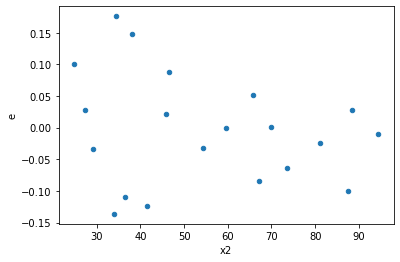

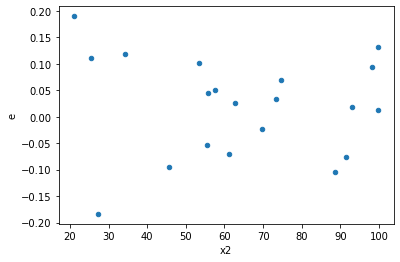

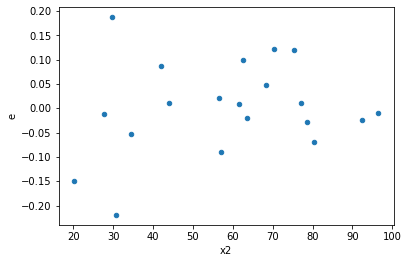

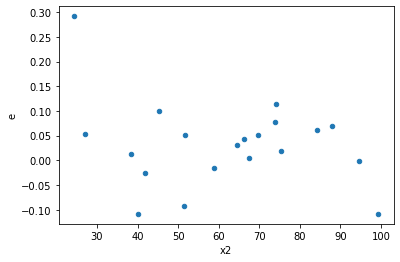

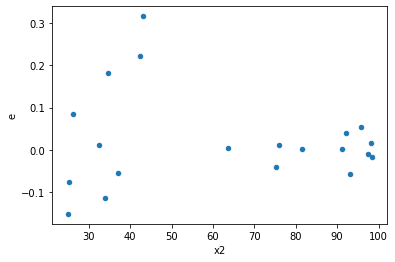

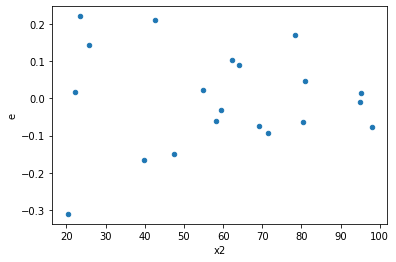

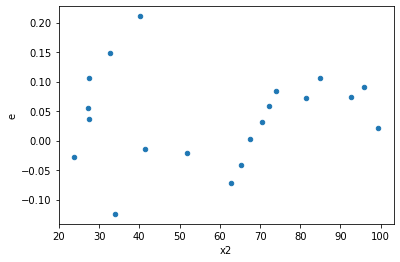

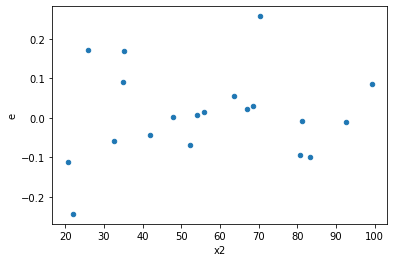

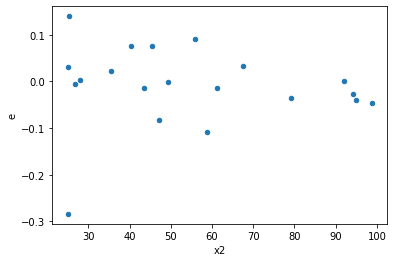

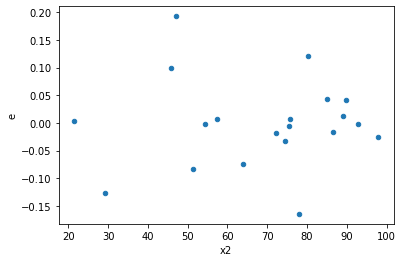

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2", "x3"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,8.0,6.0,0.04190874500119168,0.05096003546471938,0.00523859312514896,0.008493339244119897,1.6213015672749709,0.5728031221031473,0.7135984389484263,0.28640156105157366,Reject001=1 : Homoscedasticity
3.0,7.0,7.0,0.027148359019072157,0.08187643129598209,0.003878337002724594,0.011696633042283156,3.0158887776039274,0.16851394469785275,0.9157430276510736,0.08425697234892637,Reject001=1 : Homoscedasticity
12.0,8.0,6.0,0.044660337487738656,0.04670541460615858,0.005582542185967332,0.007784235767693097,1.3943890629720803,0.704820438761103,0.6475897806194485,0.3524102193805515,Reject001=1 : Homoscedasticity
13.0,9.0,5.0,0.04805672654821845,0.06484501636019578,0.005339636283135383,0.012969003272039157,2.4288177292150475,0.3411714646003583,0.8294142676998209,0.17058573230017915,Reject001=1 : Homoscedasticity
14.0,2.0,12.0,0.004585991502979481,0.10331356010873394,0.0022929957514897406,0.008609463342394494,3.7546791514118576,0.10830775713331975,0.9458461214333401,0.054153878566659874,Reject001=1 : Homoscedasticity
15.0,9.0,5.0,0.04047144423949395,0.04728933393804212,0.0044968271377215496,0.009457866787608423,2.1032311222887103,0.42739136644101117,0.7863043167794944,0.21369568322050558,Reject001=1 : Homoscedasticity
16.0,6.0,8.0,0.025505016967645594,0.10579922487688508,0.004250836161274266,0.013224903109610634,3.111129812551098,0.14093799591505474,0.9295310020424726,0.07046899795752737,Reject001=1 : Homoscedasticity
20.0,5.0,9.0,0.021667189682173273,0.05583948134937687,0.0043334379364346545,0.00620438681659743,1.4317470118660804,0.6021028848531711,0.6989485575734145,0.30105144242658555,Reject001=1 : Homoscedasticity
21.0,9.0,5.0,0.02937973964627836,0.036310946905318456,0.003264415516253151,0.0072621893810636915,2.224652267735551,0.392119259956907,0.8039403700215465,0.1960596299784535,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,8.0,6.0,0.04190874500119168,0.05096003546471938,0.00523859312514896,0.008493339244119897,1.6213015672749709,0.5728031221031473,Reject001=1 : Homoscedasticity
1.0,9.0,5.0,0.09655768429892082,0.01611336669263143,0.01072863158876898,0.0032226733385262857,0.3003806507718903,0.11215338531897538,Reject001=1 : Homoscedasticity
2.0,6.0,8.0,0.06551556441553293,0.028055461133191475,0.010919260735922155,0.0035069326416489344,0.32116942039050655,0.183572311732637,Reject001=1 : Homoscedasticity
3.0,7.0,7.0,0.027148359019072157,0.08187643129598209,0.003878337002724594,0.011696633042283156,3.0158887776039274,0.16851394469785275,Reject001=1 : Homoscedasticity
4.0,7.0,7.0,0.15289700872976567,0.00937329036419728,0.021842429818537953,0.0013390414805996113,0.061304602634600185,0.0015385538105421313,Reject001=0 : Heteroscedasticity
5.0,11.0,3.0,0.09286621107738945,0.0038193111541270737,0.008442382825217223,0.0012731037180423578,0.15079909835877417,0.01610144687793578,Reject001=1 : Homoscedasticity
6.0,9.0,5.0,0.07649574434161227,0.01240562695898818,0.00849952714906803,0.002481125391797636,0.2919133439169837,0.10426689713771811,Reject001=1 : Homoscedasticity
7.0,8.0,6.0,0.0998565483100945,0.04036901255362683,0.012482068538761812,0.006728168758937805,0.5390267436878873,0.4105040811141747,Reject001=1 : Homoscedasticity
8.0,8.0,6.0,0.059793073286600655,0.0172236599595222,0.007474134160825082,0.0028706099932537,0.384072580379907,0.21097809842919835,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      906
Reject001=0 : Heteroscedasticity     94
Name: Result_test, dtype: int64